# **About Dataset**

**Synthetic Dataset for Risk Assessment and Loan Approval Modeling**

This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

* **Risk Score Regression:** To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

* **Binary Classification:** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
df.dtypes

,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [ ]:
#exploring 'object' type columns
print("Total categories in the feature EmploymentStatus:\n", df["EmploymentStatus"].value_counts(), "\n")
print("Total categories in the feature EducationLevel:\n", df["EducationLevel"].value_counts())
print("Total categories in the feature MaritalStatus:\n", df["MaritalStatus"].value_counts())
print("Total categories in the feature LoanPurpose:\n", df["LoanPurpose"].value_counts())

Total categories in the feature EmploymentStatus:
 EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64 

Total categories in the feature EducationLevel:
 EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
Total categories in the feature MaritalStatus:
 MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
Total categories in the feature LoanPurpose:
 LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64


In [ ]:
#Droping the Application date column
df.drop(['ApplicationDate'], axis=1, inplace=True)

In [ ]:
df.LoanApproved.value_counts()

,count
LoanApproved,
0,15220
1,4780


In [ ]:
#Checking for missing data
df.isna().sum()

,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


In [ ]:
# Using Label Encoder on the tyoe 'object' columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])


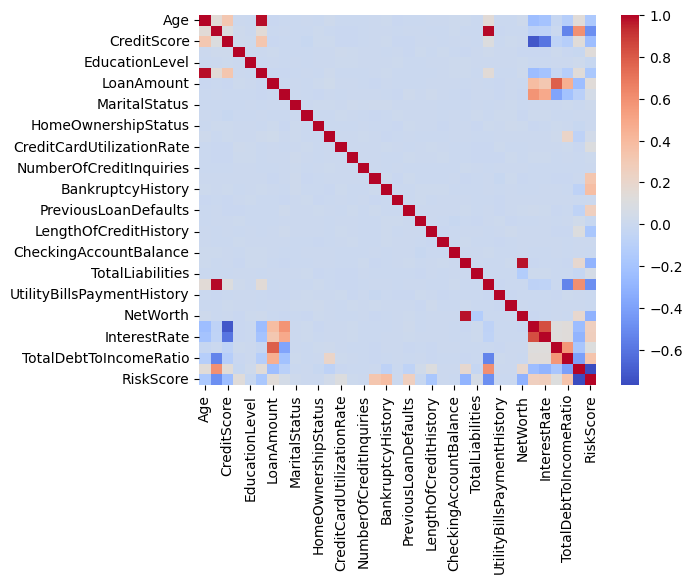

In [ ]:
# printin a heatmap to get a better understanding of teh correlation between features
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

plt.show()

In [ ]:
#Printing the correlation with RiskScore column
corr = df.corr()
corr['RiskScore'].sort_values(ascending=False)

,RiskScore
RiskScore,1.000000
BankruptcyHistory,0.377578
TotalDebtToIncomeRatio,0.342643
DebtToIncomeRatio,0.326500
InterestRate,0.268203
PreviousLoanDefaults,0.258659
BaseInterestRate,0.256233
LoanAmount,0.137981
EmploymentStatus,0.132964
MonthlyLoanPayment,0.115501


<ipython-input-10-337eac0f9531>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="NetWorth", data=df, palette="plasma", ax=axes[0])
<ipython-input-10-337eac0f9531>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="TotalDebtToIncomeRatio", data=df, palette="plasma", ax=axes[1])
<ipython-input-10-337eac0f9531>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="DebtToIncomeRatio", data=df, palette="plasma", ax=axes[2])
<ipython-input-10-337eac0f9531>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

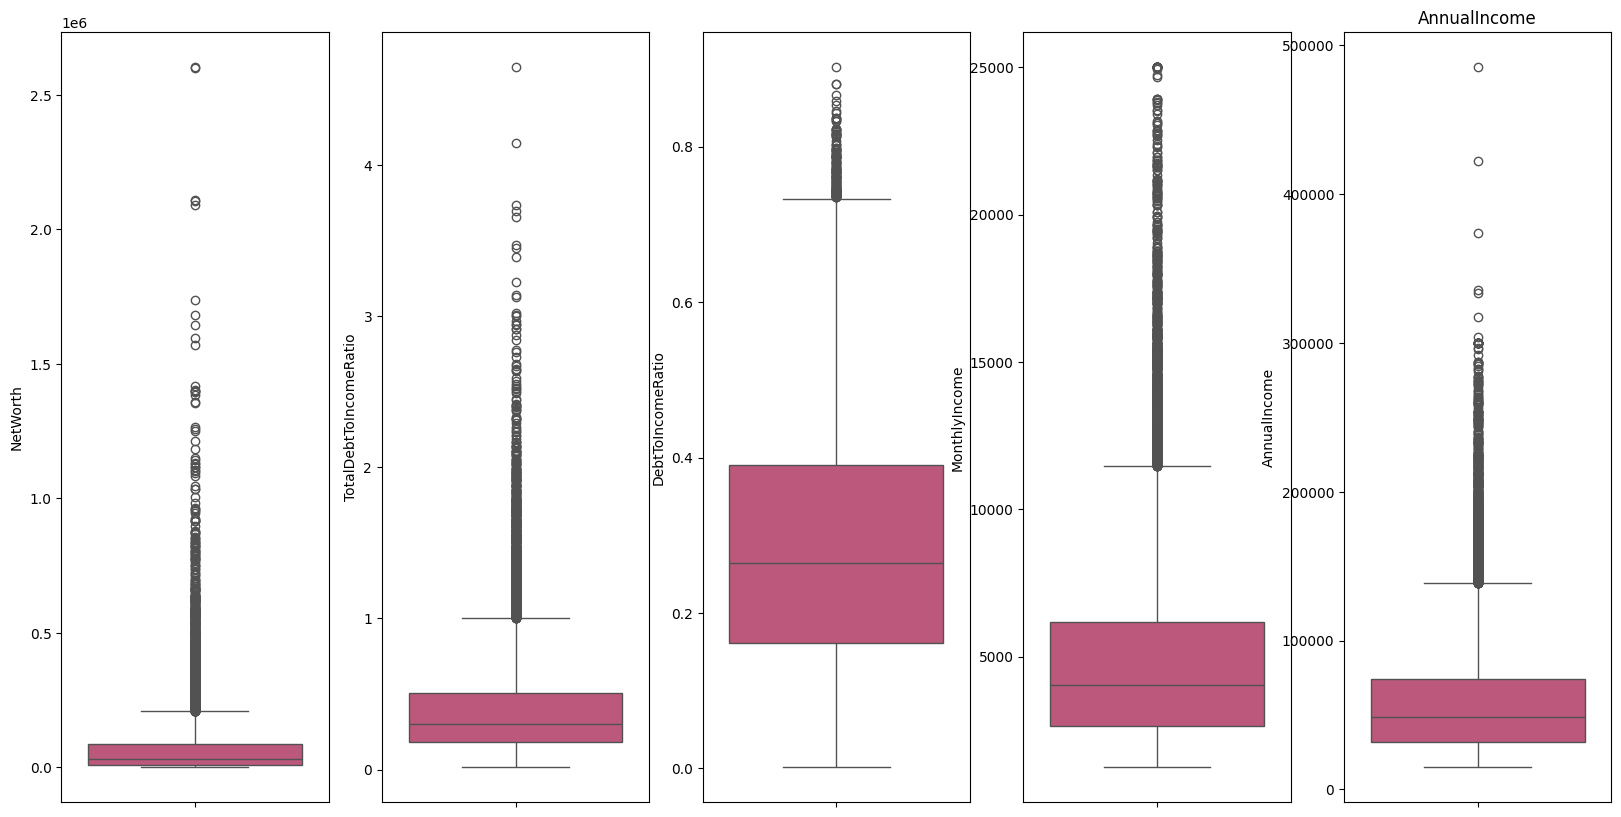

In [ ]:
#Visualizing Outliers to the fetures with the highest correlation with the target

f, axes = plt.subplots(ncols=5, figsize=(20, 10))

sns.boxplot(y="NetWorth", data=df, palette="plasma", ax=axes[0])
axes[4].set_title('NetWorth')

sns.boxplot(y="TotalDebtToIncomeRatio", data=df, palette="plasma", ax=axes[1])
axes[4].set_title('TotalDebtToIncomeRatio')

sns.boxplot(y="DebtToIncomeRatio", data=df, palette="plasma", ax=axes[2])
axes[4].set_title('DebtToIncomeRatio')

sns.boxplot(y="MonthlyIncome", data=df, palette="plasma", ax=axes[3])
axes[4].set_title('MonthlyIncome')

sns.boxplot(y="AnnualIncome", data=df, palette="plasma", ax=axes[4])
axes[4].set_title('AnnualIncome')

plt.show()

In [ ]:
# Winsorizing the outliers
from scipy.stats import mstats

for col in df.columns[0:-2]:
    df[col] = mstats.winsorize(df[col], limits=[0.05, 0.05])

<ipython-input-12-8400db46f533>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="NetWorth", data=df, palette="plasma", ax=axes[0])
<ipython-input-12-8400db46f533>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="TotalDebtToIncomeRatio", data=df, palette="plasma", ax=axes[1])
<ipython-input-12-8400db46f533>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="DebtToIncomeRatio", data=df, palette="plasma", ax=axes[2])
<ipython-input-12-8400db46f533>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

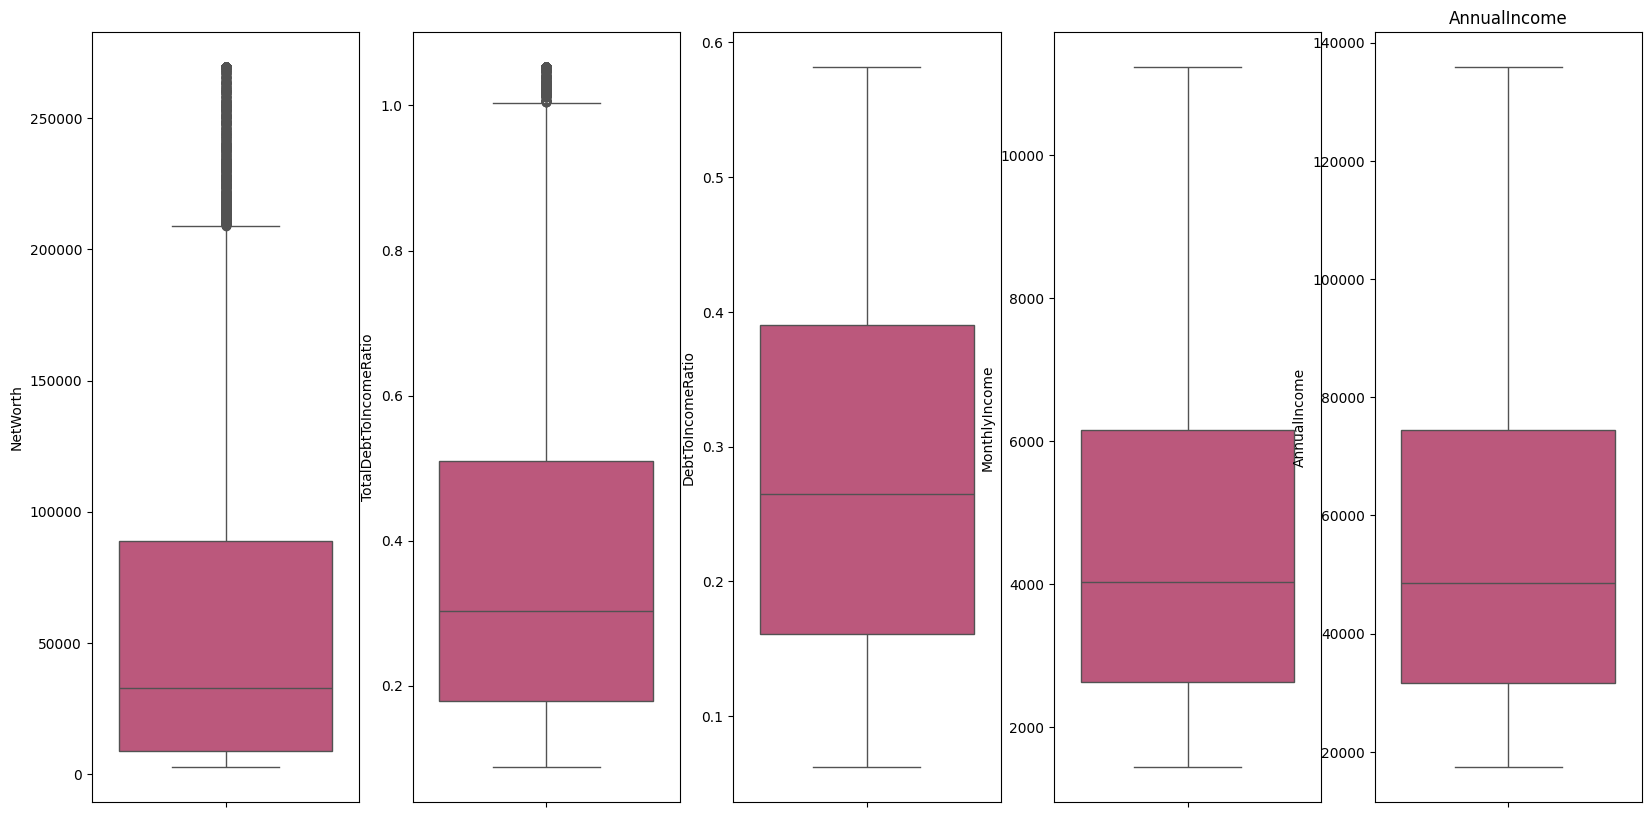

In [ ]:
#Visualizing Outliers once more after winsorizing to see the results

f, axes = plt.subplots(ncols=5, figsize=(20, 10))

sns.boxplot(y="NetWorth", data=df, palette="plasma", ax=axes[0])
axes[4].set_title('NetWorth')

sns.boxplot(y="TotalDebtToIncomeRatio", data=df, palette="plasma", ax=axes[1])
axes[4].set_title('TotalDebtToIncomeRatio')

sns.boxplot(y="DebtToIncomeRatio", data=df, palette="plasma", ax=axes[2])
axes[4].set_title('DebtToIncomeRatio')

sns.boxplot(y="MonthlyIncome", data=df, palette="plasma", ax=axes[3])
axes[4].set_title('MonthlyIncome')

sns.boxplot(y="AnnualIncome", data=df, palette="plasma", ax=axes[4])
axes[4].set_title('AnnualIncome')

plt.show()

In [ ]:
X = df.drop(['LoanApproved', 'RiskScore'], axis=1)
y = df['RiskScore']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.feature_selection import SelectKBest

X_filt = SelectKBest(k=20).fit_transform(X_scaled, y)

In [ ]:
#Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filt, y, test_size=0.2, random_state=42)

In [ ]:
#applying linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

#clalculating mean square error and R2 score
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ',r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

MSE:  11.555372358520447
R2 Score:  0.8138855671491625
MAE:  2.6698148987303325


In [ ]:
#applying random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#clalculating mean square error and R2 score
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ',r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

MSE:  7.465943085999999
R2 Score:  0.8797511910446618
MAE:  1.6947319999999995


In [ ]:
#applying XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

#clalculating mean square error and R2 score
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ',r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

MSE:  7.087914897145203
R2 Score:  0.8858398310112019
MAE:  1.7089782551765438


In [ ]:
#applying decision trees
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

#clalculating mean square error and R2 score
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ',r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

MSE:  17.784149999999997
R2 Score:  0.7135629308783245
MAE:  2.28485


In [ ]:
# We can our best results achieved with Random Forest and XGBoost